<a href="https://colab.research.google.com/github/wko1014/RL_Study/blob/main/notes/Multi_Armed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import APIs
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define functions
def multi_armed_bandits(k):
    mab_reward_mean = np.random.RandomState(seed=951014).rand(k)*10-5
    mab_reward_stdev = np.random.RandomState(seed=5930).rand(k)
    return mab_reward_mean, mab_reward_stdev

def pull_bandits(k, pull):
    mean, std = multi_armed_bandits(k)
    reward = np.random.normal(loc=mean[pull], scale=std[pull])
    return reward

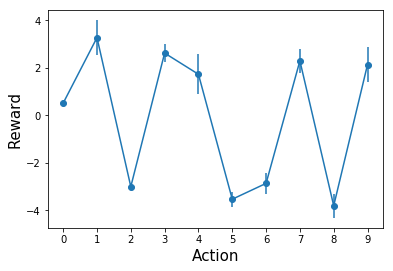

In [ ]:
num_arms = 10

action_list = np.arange(num_arms)
mean_reward, std_reward = multi_armed_bandits(num_arms)

plt.errorbar(action_list, mean_reward, std_reward, fmt='-o')
plt.xticks(np.arange(num_arms))
plt.xlabel("Action", fontsize=15)
plt.ylabel("Reward", fontsize=15)
plt.show()

$$Q_t(a)\doteq \frac{\sum_{i=1}^{t-1}R_i\cdot \mathbb{1}_{A_i=a}}{\sum_{i=1}^{t-1} \mathbb{1}_{A_i=a}}$$

Calculated Q-table for 0.100 epsilon: 
 [ 0.53100756  3.27437656 -3.01454968  2.57853783  1.52636869 -3.49523968
 -3.16718448  2.33605786 -4.0025475   2.06559443]
The number of selected actions:
 [ 14. 818.  14.  17.   8.  11.   8.  48.   9.  53.]
Calculated Q-table for 0.010 epsilon: 
 [ 0.50784153  3.27443364 -2.96111683  2.66991863  0.         -3.46374443
 -3.20968834  1.60432255 -3.9030616   1.35419823]
The number of selected actions:
 [224. 764.   2.   4.   0.   1.   1.   1.   2.   1.]
Calculated Q-table for 0.000 epsilon: 
 [0.51147219 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
The number of selected actions:
 [1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


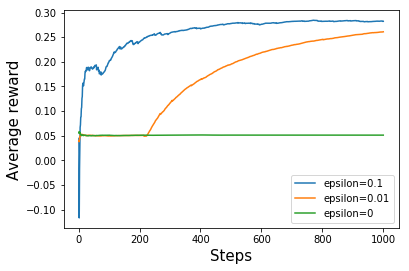

In [ ]:
num_step = 1000
steps = np.arange(num_step) + 1 # [1, 2, ..., 1000]

def action_value_method(epsilon, Q_t):
    cumulated_actions = np.zeros(num_arms)
    cumulated_rewards = np.zeros(num_arms)

    expected_rewards = np.zeros(num_step)

    optimal_action = np.zeros(num_step)
    opt_act = 0

    for step in steps:
    # Epsilon-Greedy Exploration-Exploitation
        if epsilon > np.random.uniform():
            A_t = np.random.randint(num_arms)
        else:
            A_t = np.argmax(Q_t)

        reward = pull_bandits(k=num_arms, pull=A_t)

        cumulated_actions[A_t] += 1 
        cumulated_rewards[A_t] = cumulated_rewards[A_t] + np.array(reward)
        Q_t[A_t] = cumulated_rewards[A_t] / cumulated_actions[A_t]

        if A_t == 1:
            opt_act += 1

        optimal_action[step-1] = opt_act/step

        expected_rewards[step-1] = np.mean(cumulated_rewards)/step

    print("Calculated Q-table for %.3f epsilon:" % epsilon, "\n", Q_t)
    print("The number of selected actions:\n", cumulated_actions)
    return expected_rewards, optimal_action

expected_rewards_1, optimal_action_1 = action_value_method(0.1, np.zeros(num_arms))
expected_rewards_2, optimal_action_2 = action_value_method(0.01, np.zeros(num_arms))
expected_rewards_3, optimal_action_3 = action_value_method(0, np.zeros(num_arms))

plt.plot(steps, expected_rewards_1, label="epsilon=0.1")
plt.plot(steps, expected_rewards_2, label="epsilon=0.01")
plt.plot(steps, expected_rewards_3, label="epsilon=0")
plt.legend()
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average reward", fontsize=15)
plt.show()

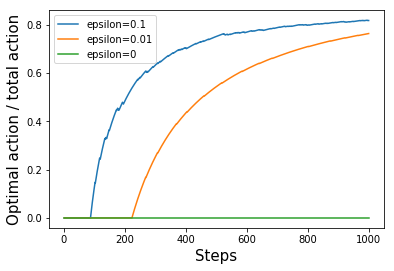

In [ ]:
plt.plot(steps, optimal_action_1, label="epsilon=0.1")
plt.plot(steps, optimal_action_2, label="epsilon=0.01")
plt.plot(steps, optimal_action_3, label="epsilon=0")
plt.legend()
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Optimal action / total action", fontsize=15)
plt.show()

In [ ]:
def incremental_implementation(epsilon):
    Q_t = np.zeros(num_arms) # Q-table
    N = np.zeros(num_arms)
    for step in steps:
        # Epsilon-Greedy Exploration-Exploitation
        if epsilon > np.random.uniform():
            A_t = np.random.randint(num_arms)
        else:
            A_t = np.argmax(Q_t)

        reward = pull_bandits(k=num_arms, pull=A_t)

        N[A_t] = N[A_t] + 1
        Q_t[A_t] = Q_t[A_t] +[reward - Q_t[A_t]]/N[A_t]

    print("Q-table, epsilon: %f\n" %epsilon, Q_t)
    return

incremental_implementation(0.1)

Q-table, epsilon: 0.100000
 [ 0.52605383  3.28083705 -2.98208358  2.63481031  1.77592963 -3.45992453
 -2.85103109  1.97938798 -3.93165289  2.23014049]


Calculated Q-table for 0.000 epsilon: 
 [ 0.56640455  3.24251241 -2.86060046  2.54537848  1.78553775 -3.80371957
 -1.83820929  2.73853984 -4.1649143   1.22538503]
The number of selected actions:
 [  1. 990.   1.   1.   2.   1.   1.   1.   1.   1.]


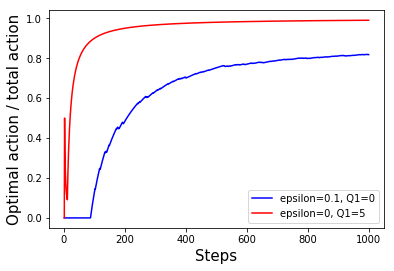

In [ ]:
# With optimistic initial values
_, optimal_action_4 = action_value_method(0, 5*np.ones(num_arms)) # Q1 = +5

plt.plot(steps, optimal_action_1, label="epsilon=0.1, Q1=0", c="blue")
plt.plot(steps, optimal_action_4, label="epsilon=0, Q1=5", c="red")
plt.legend()
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Optimal action / total action", fontsize=15)
plt.show()

Calculated Q-table for 2.000 c: 
 [ 0.53300564  3.26012665 -2.98131715  2.65699059  1.90290344 -3.59195351
 -3.48695112  2.53387508 -3.63227756  1.56879775]
The number of selected actions:
 [  4. 890.   1.  47.  12.   1.   1.  35.   1.   8.]


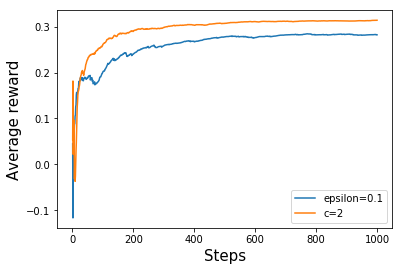

In [ ]:
def action_value_UCB(c, Q_t):
    cumulated_actions = np.zeros(num_arms)
    cumulated_rewards = np.zeros(num_arms)

    expected_rewards = np.zeros(num_step)

    optimal_action = np.zeros(num_step)
    opt_act = 0
    N_t = np.zeros(num_arms)

    for step in steps:
        # We use UCB exploration instead of epsilon-greedy method.
        if np.min(N_t) == 0:
            A_t = np.argmin(N_t)
            N_t[A_t] +=1
        else:
            tmp = Q_t + c * np.sqrt(np.log(step)/N_t)
            A_t = np.argmax(tmp)
            N_t[A_t] += 1

        reward = pull_bandits(k=num_arms, pull=A_t)

        cumulated_actions[A_t] += 1 
        cumulated_rewards[A_t] = cumulated_rewards[A_t] + np.array(reward)
        Q_t[A_t] = cumulated_rewards[A_t] / cumulated_actions[A_t]

        if A_t == 1:
            opt_act += 1

        optimal_action[step-1] = opt_act/step

        expected_rewards[step-1] = np.mean(cumulated_rewards)/step

    print("Calculated Q-table for %.3f c:" % c, "\n", Q_t)
    print("The number of selected actions:\n", cumulated_actions)
    return expected_rewards, optimal_action

expected_rewards_5, _ = action_value_UCB(2, np.zeros(num_arms))
plt.plot(steps, expected_rewards_1, label="epsilon=0.1")
plt.plot(steps, expected_rewards_5, label="c=2")
plt.legend()
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Average reward", fontsize=15)
plt.show()

In [ ]:
def softmax(vec):
    return np.exp(vec)/np.sum(np.exp(vec))

def gradient_bandit(alpha, baseline, Q_t):
    cumulated_actions = np.zeros(num_arms)
    cumulated_rewards = np.zeros(num_arms)

    expected_rewards = np.zeros(num_step)

    optimal_action = np.zeros(num_step)
    opt_act = 0
    H_t = np.random.rand(num_arms)

    R_total = 0

    for step in steps:
        # Calculate the probability distribution
        pi_t = softmax(H_t)
        A_t = np.argmax(pi_t)

        reward = pull_bandits(k=num_arms, pull=A_t)
        R_total = R_total + reward
        R_bar = R_total/step + baseline

        # Gradient Ascent and update the preference, H_t
        H_t = H_t - alpha * (reward-R_bar) * pi_t
        H_t[A_t] = H_t[A_t] + alpha * (reward-R_bar)*(1-pi_t[A_t])

        if A_t == 1:
            opt_act += 1

        optimal_action[step-1] = opt_act/step

        expected_rewards[step-1] = np.mean(cumulated_rewards)/step
    return expected_rewards, optimal_action

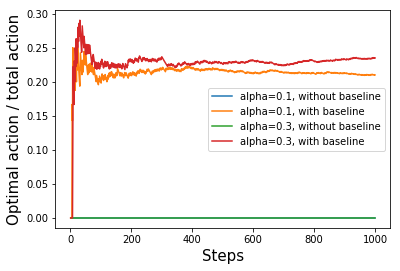

In [ ]:
_, opt_action_6 = gradient_bandit(0.1, 0, np.zeros(num_arms))
_, opt_action_7 = gradient_bandit(0.1, 4, np.zeros(num_arms))
_, opt_action_8 = gradient_bandit(0.3, 0, np.zeros(num_arms))
_, opt_action_9 = gradient_bandit(0.3, 4, np.zeros(num_arms))

plt.plot(steps, opt_action_6, label="alpha=0.1, without baseline")
plt.plot(steps, opt_action_7, label="alpha=0.1, with baseline")
plt.plot(steps, opt_action_8, label="alpha=0.3, without baseline")
plt.plot(steps, opt_action_9, label="alpha=0.3, with baseline")
plt.legend()
plt.xlabel("Steps", fontsize=15)
plt.ylabel("Optimal action / total action", fontsize=15)
plt.show()